# We have used multiple libraries to perform EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

# Data Exploration


Let's explore the data Set.

# Attribute Information:

* age
* sex
* cp = chest pain type (4 values)
* trestbps = resting blood pressure
* chol = serum cholestoral in mg/dl
* fbs = fasting blood sugar > 120 mg/dl
* restecg = resting electrocardiographic results (values 0,1,2)
* thalach = maximum heart rate achieved
* exang = exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* slope = the slope of the peak exercise ST segment
* ca = number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

# Data Profiling

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.shape

(1025, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [7]:
df['target'].unique()

array([0, 1], dtype=int64)

# EDA

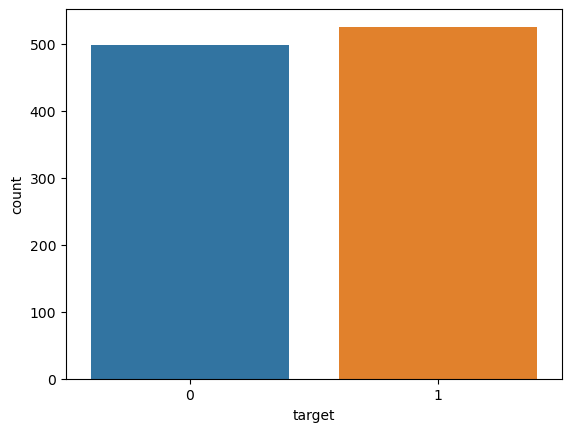

In [8]:
sns.countplot(data=df,x='target');

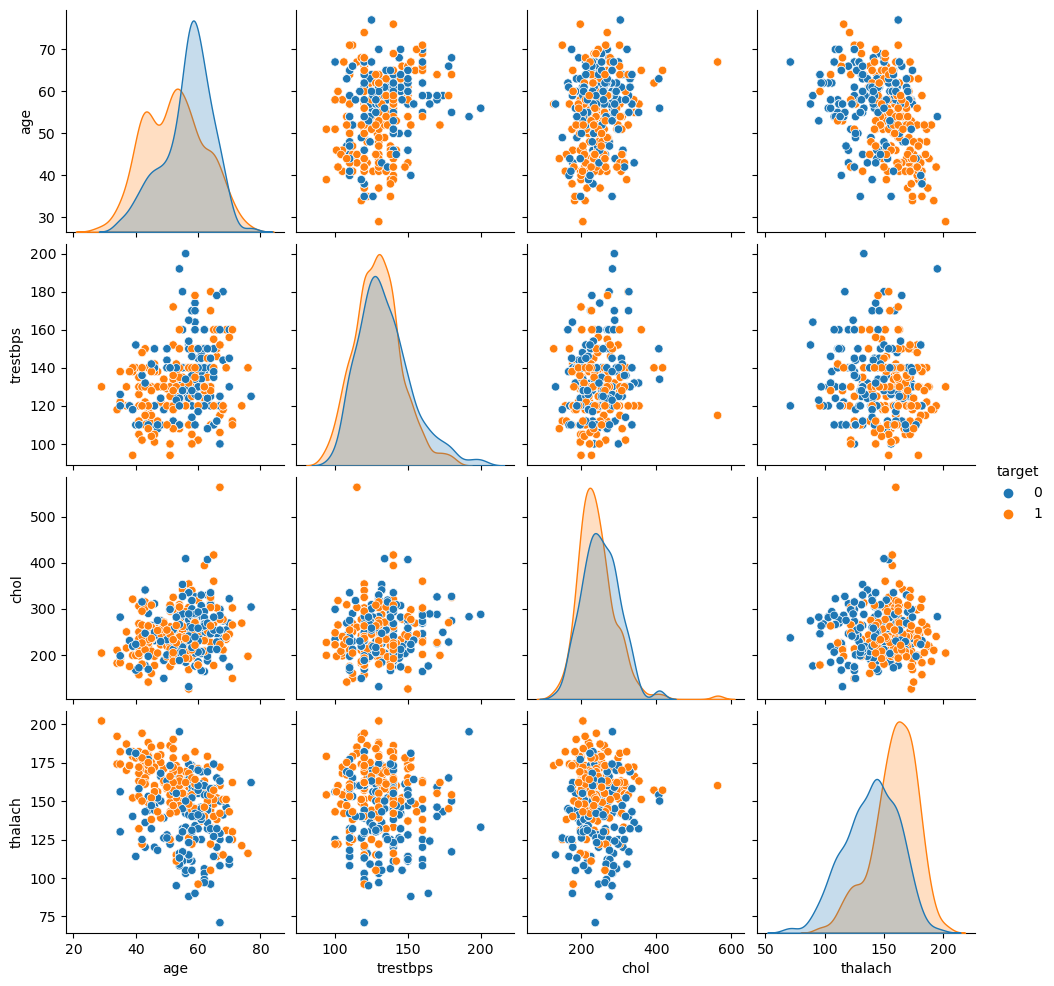

In [9]:
sns.pairplot(data=df,vars=['age','trestbps', 'chol','thalach'],hue='target')

<Axes: >

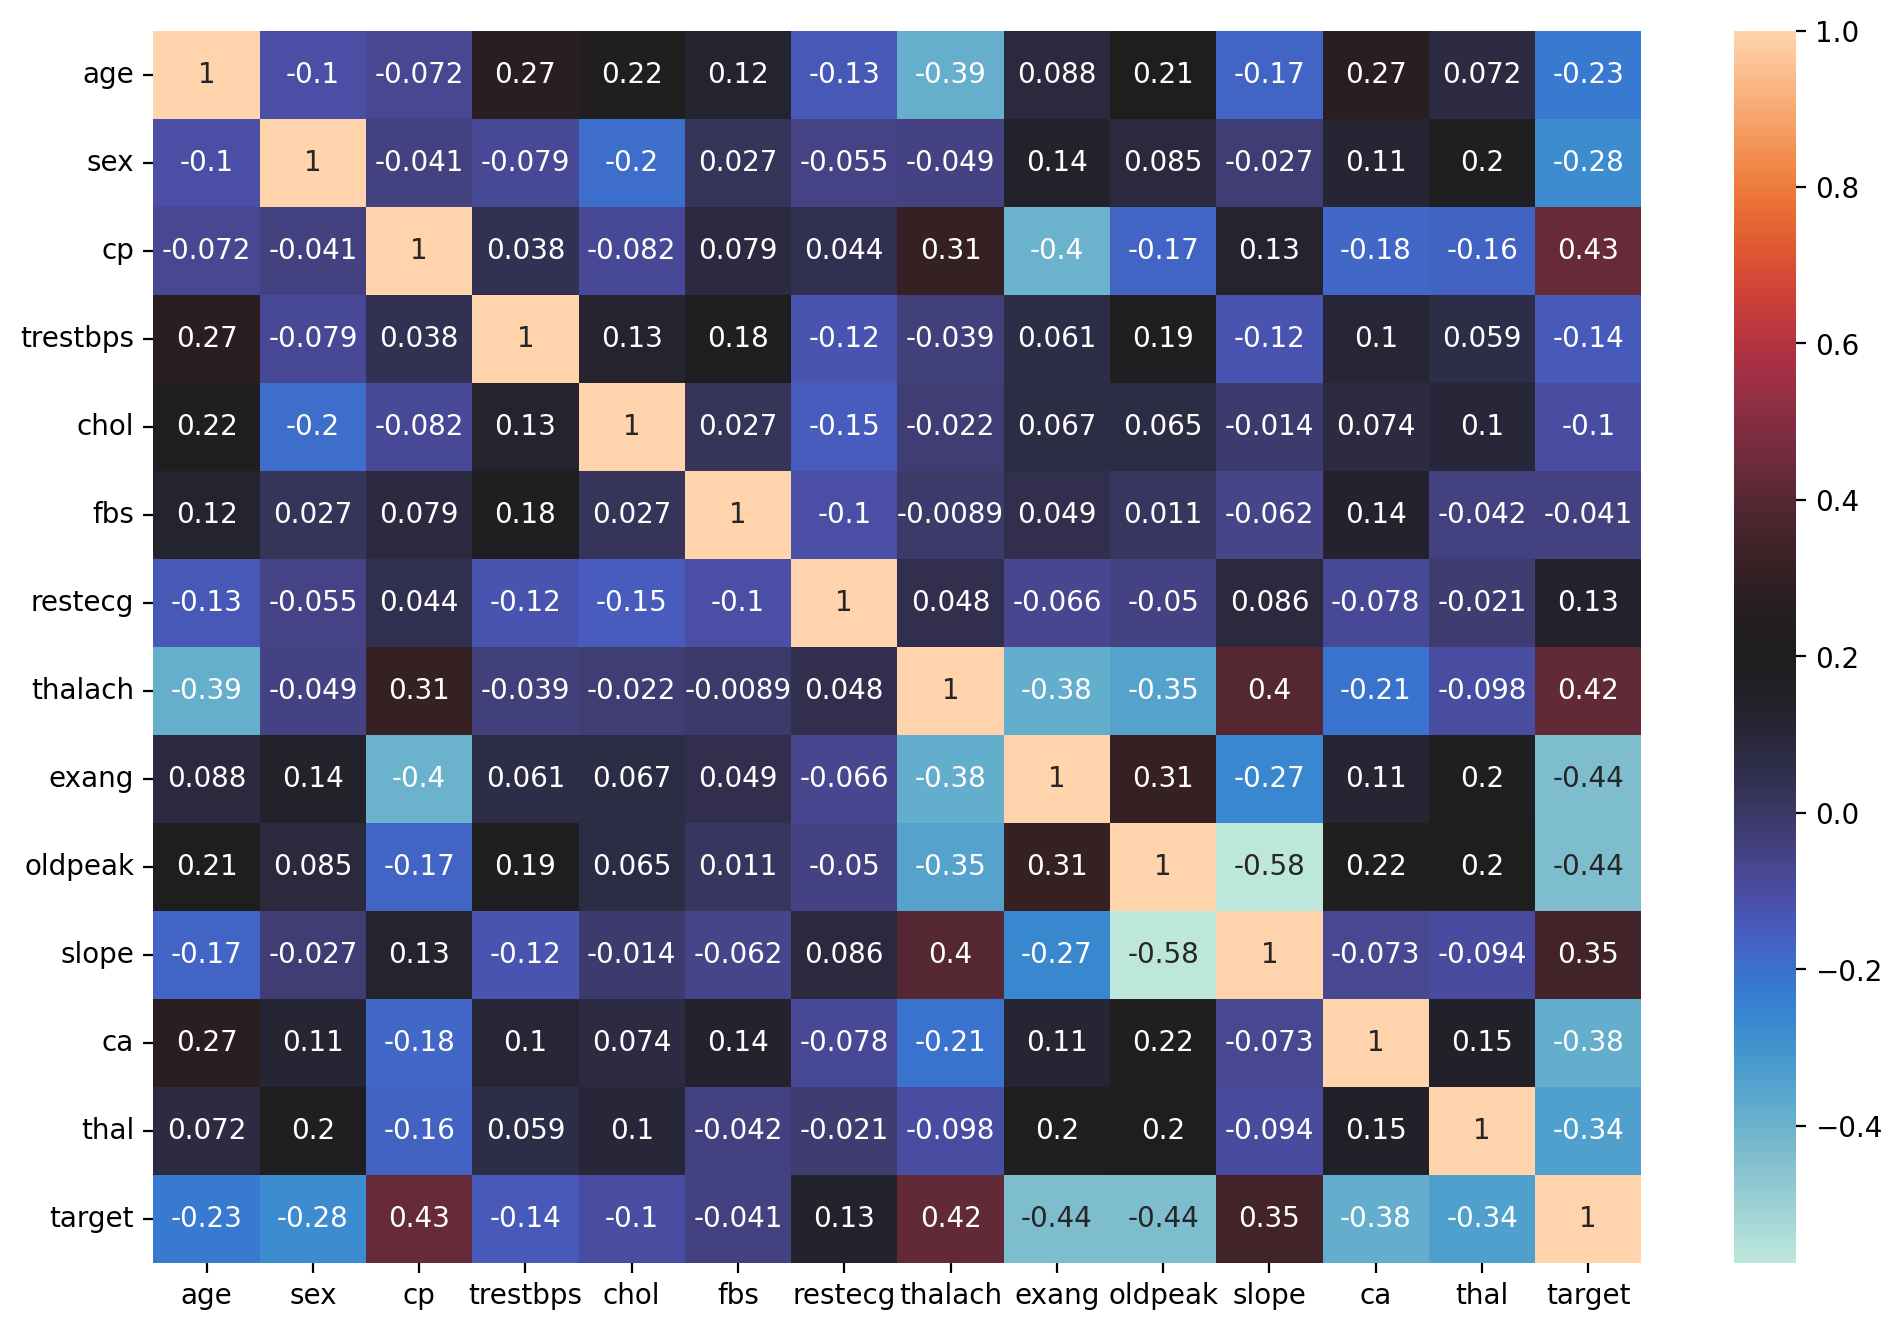

In [10]:
fig = plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(data=df.corr(),annot=True,cmap='icefire')

# Observation :
* 1.The data set has 1025 rows and 14 columns. The target column actually predicts the presence or absence of heart disease.
* 2.The data is balanced with even distribution of presence and absence of heart disease.
* 3.Chest Pain, Heart rate achieved(thalach) and slope has high positive correlation with Heart disease

In [11]:
X = df.drop('target',axis=1)
y = df['target']

# Model Building 

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [13]:
X_train.shape

(820, 13)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Model-1 

In [16]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='sag', multi_class='ovr', max_iter=5000)

* I have actually tried using different solver techniques such as sag, saga and liblinear and it gives the same result everytime.

In [17]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,10)
C = np.logspace(0,10,10)

param_grid = {'penalty': penalty, 'l1_ratio': l1_ratio, 'C':C}

In [18]:
from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(log_model, param_grid=param_grid)
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='sag'),
             param_grid={'C': array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [19]:
grid_model.best_params_
best_coef = pd.DataFrame()
best_coef['attribute'] = pd.DataFrame(df.columns)
best_coef['coef'] = pd.DataFrame(grid_model.best_estimator_.coef_).transpose()
best_coef = best_coef.sort_values('coef')
best_coef

,attribute,coef
11,ca,-0.778988
1,sex,-0.735245
9,oldpeak,-0.544693
12,thal,-0.538634
8,exang,-0.401431
3,trestbps,-0.356652
4,chol,-0.236732
5,fbs,-0.118471
0,age,-0.101947
6,restecg,0.203903


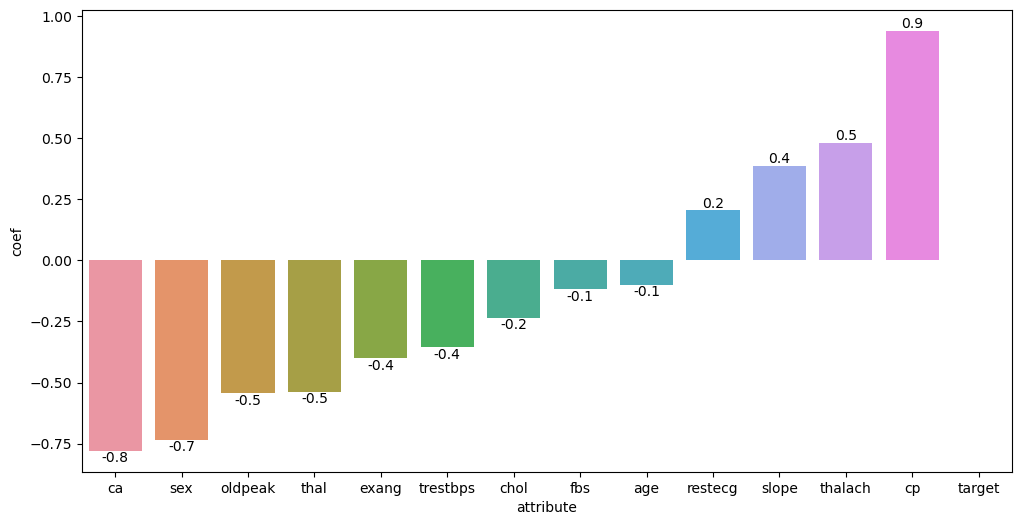

In [20]:
fig,ax = plt.subplots(figsize=(12,6))
sns.barplot(data=best_coef,x='attribute',y='coef',ax=ax)
# Add labels to Bar Plot
ax.bar_label(ax.containers[0], fmt='%.1f');

# Model Evaluation

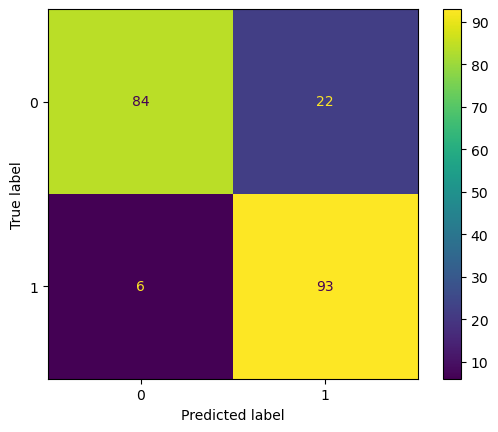

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
y_pred = grid_model.predict(scaled_X_test)
ConfusionMatrixDisplay.from_estimator(grid_model,scaled_X_test,y_test);

In [22]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86        90
           1       0.94      0.81      0.87       115

    accuracy                           0.86       205
   macro avg       0.87      0.87      0.86       205
weighted avg       0.87      0.86      0.86       205



# Model - 2 

In [23]:
from sklearn.linear_model import LogisticRegressionCV
log_model_2 = LogisticRegressionCV()
log_model_2.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [24]:
log_model_2.C_
    

array([166.81005372])

In [25]:
log_model_2.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [26]:
log_model_2.coef_

array([[-0.10190222, -0.73531582,  0.93901851, -0.35667684, -0.23676021,
        -0.11844265,  0.20391559,  0.48169447, -0.40140938, -0.54461908,
         0.38724189, -0.77900352, -0.53860629]])

In [27]:
coefs = pd.Series(index=X.columns,data=log_model_2.coef_[0])
coefs = coefs.sort_values()

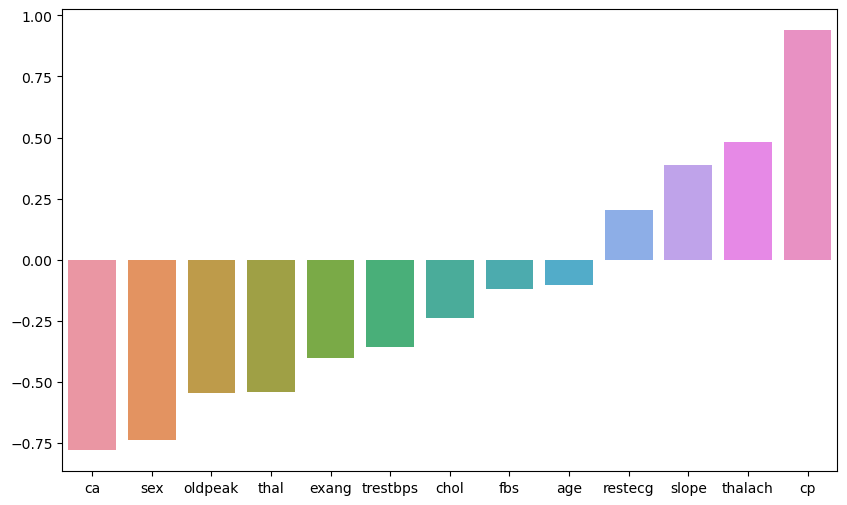

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values);

# Model Evaluation

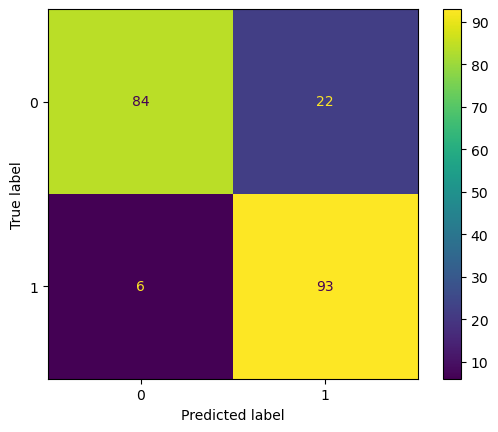

In [29]:
y_pred_2 = log_model_2.predict(scaled_X_test)
ConfusionMatrixDisplay.from_estimator(log_model_2,scaled_X_test,y_test);

In [30]:
print(classification_report(y_pred_2,y_test))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86        90
           1       0.94      0.81      0.87       115

    accuracy                           0.86       205
   macro avg       0.87      0.87      0.86       205
weighted avg       0.87      0.86      0.86       205



# Observation :
* Seems our second more simpler model performs a bit better. However, we could not actually delve into the details of how the model actually worked.

* Seems to be a trade off.